### Importing necessary libraries

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import os
from sklearn.datasets import fetch_california_housing

### Checking for CPU/GPU

In [51]:
devices = [ "CPU" , "GPU" ]
for device in devices:
  out = tf.config.list_physical_devices ( device )
  if len ( out ) > 0:
    print ( device , "is available." )
    print ( device )
  else:
    print ( device , "is not available." )

CPU is available.
CPU
GPU is available.
GPU


### Checking for GPU configuration

In [52]:
!nvidia-smi

Mon Jan 25 10:38:34 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    61W / 149W |    158MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Reading and Viewing the data

In [53]:
housing = fetch_california_housing ( )
data = pd.DataFrame ( housing.data , columns = housing.feature_names )
data [ "Price" ] = housing.target
data.head ( )

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Description of features

In [54]:
print ( housing.DESCR )

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

### Splitting the data into X and y

In [55]:
X = data.drop ( "Price" , axis = 1 )
y = data [ "Price" ]

### Checking the null values

In [56]:
data.isnull ( ).sum ( )

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

### Shape of the data

In [57]:
print ( "Rows:" , data.shape [ 0 ] , "\tColumns:" , data.shape [ 1 ] )

Rows: 20640 	Columns: 9


### Descriptive Statistical Information

In [58]:
data.describe ( )

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Nature of Variables

In [59]:
data.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## Since the aim here is to implement an Artificial Neural Network (ANN), I'll not perform any sort of Exploratory Data Analysis, Feature Engineering or Statistical tests.

### Splitting the data into Train, Test and Validation

In [60]:
X_train_full , X_test , y_train_full , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 37 )
X_train , X_valid , y_train , y_valid = train_test_split ( X_train_full , y_train_full , test_size = 0.1 , random_state = 37 )

### Implementing the StandardScaler

In [61]:
ss = StandardScaler ( )
X_train = ss.fit_transform ( X_train )
X_valid = ss.transform ( X_valid )
X_test = ss.transform ( X_test )
print ( "Shape of X_train: {}\tShape of X_test: {}\tShape of X_valid: {}" 
       .format ( X_train.shape , X_test.shape , X_valid.shape ) )

Shape of X_train: (13003, 8)	Shape of X_test: (6192, 8)	Shape of X_valid: (1445, 8)


### Implementing the Artificial Neural Network (ANN)

In [62]:
layers = [ tf.keras.layers.Dense ( 30 , activation = "relu" , input_shape = X_train.shape [ 1 : ] ) , 
          tf.keras.layers.Dense ( 30 , activation = "relu" ) , 
          tf.keras.layers.Dense ( 30 , activation = "relu" ) , 
          tf.keras.layers.Dense ( 30 , activation = "relu" ) , 
          tf.keras.layers.Dense ( 10 , activation = "relu" ) , 
          tf.keras.layers.Dense ( 5 , activation = "relu" ) ,
          tf.keras.layers.Dense ( 1 ) ]
model = tf.keras.models.Sequential ( layers )
model.compile ( loss = "mse" , optimizer = "adam" )
history = model.fit ( X_train , y_train , validation_data = ( X_valid , y_valid ) , epochs = 30 )

Epoch 1/30
407/407 [==============================] - 2s 3ms/step - loss: 3.3893 - val_loss: 0.5051
Epoch 2/30
407/407 [==============================] - 1s 3ms/step - loss: 0.4877 - val_loss: 0.3875
Epoch 3/30
407/407 [==============================] - 1s 3ms/step - loss: 0.4082 - val_loss: 0.3665
Epoch 4/30
407/407 [==============================] - 1s 3ms/step - loss: 0.3995 - val_loss: 0.3424
Epoch 5/30
407/407 [==============================] - 1s 3ms/step - loss: 0.3705 - val_loss: 0.3311
Epoch 6/30
407/407 [==============================] - 1s 3ms/step - loss: 0.3514 - val_loss: 0.3217
Epoch 7/30
407/407 [==============================] - 1s 3ms/step - loss: 0.3372 - val_loss: 0.3179
Epoch 8/30
407/407 [==============================] - 1s 3ms/step - loss: 0.3305 - val_loss: 0.3092
Epoch 9/30
407/407 [==============================] - 1s 4ms/step - loss: 0.3245 - val_loss: 0.3030
Epoch 10/30
407/407 [==============================] - 1s 3ms/step - loss: 0.3172 - val_loss: 0.3030

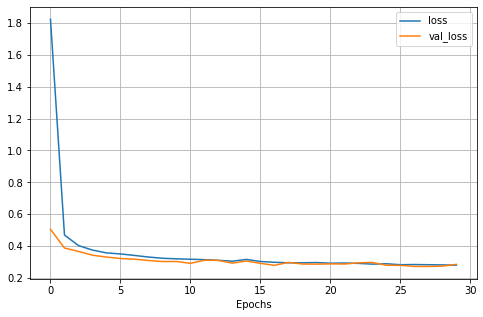

In [64]:
pd.DataFrame ( history.history ).plot ( figsize = ( 8 , 5 ) )
plt.grid ( True )
plt.xlabel ( "Epochs" )
plt.show ( )

### Model Evaluation

In [70]:
print ( model.evaluate ( X_test , y_test ) )

194/194 [==============================] - 0s 2ms/step - loss: 0.2808
0.2807735502719879


### Predicting the first 5 test samples

In [76]:
print ( model.predict ( X_test [ : 5 ] ) )

[[1.0334992]
 [1.2131063]
 [0.8198099]
 [4.357898 ]
 [1.9076056]]


### Altering the learning rate, checkpointing the best model and early stopping

In [81]:
model.compile ( loss = "mse" , optimizer = tf.keras.optimizers.Adam ( learning_rate = 1e-03 ) )
earlystop = tf.keras.callbacks.EarlyStopping ( patience = 10 , restore_best_weights = True )
checkpoint = tf.keras.callbacks.ModelCheckpoint ( "Best_Model.h5" , save_best_only = True )
history = model.fit ( X_train , y_train , 
                     validation_data = ( X_valid , y_valid ) , 
                     epochs = 100 , callbacks = [ checkpoint , earlystop ] )

Epoch 1/100
407/407 [==============================] - 2s 4ms/step - loss: 0.2416 - val_loss: 0.2631
Epoch 2/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2565 - val_loss: 0.2712
Epoch 3/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2444 - val_loss: 0.2815
Epoch 4/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2467 - val_loss: 0.2840
Epoch 5/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2526 - val_loss: 0.2730
Epoch 6/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2459 - val_loss: 0.2616
Epoch 7/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2456 - val_loss: 0.2734
Epoch 8/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2549 - val_loss: 0.2640
Epoch 9/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2461 - val_loss: 0.2625
Epoch 10/100
407/407 [==============================] - 1s 3ms/step - loss: 0.2482 - val_lo

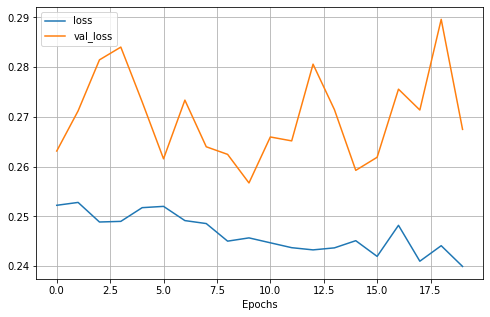

In [82]:
pd.DataFrame ( history.history ).plot ( figsize = ( 8 , 5 ) )
plt.xlabel ( "Epochs" )
plt.grid ( True )
plt.show ( )

In [83]:
# Loading the best model
model = tf.keras.models.load_model ( "Best_Model.h5"  )
model.evaluate ( X_test , y_test )

194/194 [==============================] - 0s 2ms/step - loss: 0.2554


0.2554281949996948